In [200]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.electronic_structure.plotter import BSPlotter

with MPRester("5TRoGi3ks3zfqgmPsey1") as m:
    structure = m.get_structure_by_material_id("mp-754883")
    w = CifWriter(structure)
    w.write_file('mystructure.cif')
    bandstructure = m.get_bandstructure_by_material_id("mp-754883")  

In [201]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
import numpy as np
import matplotlib.pyplot as plt
import pymatgen.electronic_structure.bandstructure as bandstruc

Avant de commencer l'analyse, on va plotter la structure des bandes électroniques pour le KHoO2. On peut y observer une bande interdite significative dont nous allons calculer la valeur.

**Structure des bandes électroniques du KHoO2**

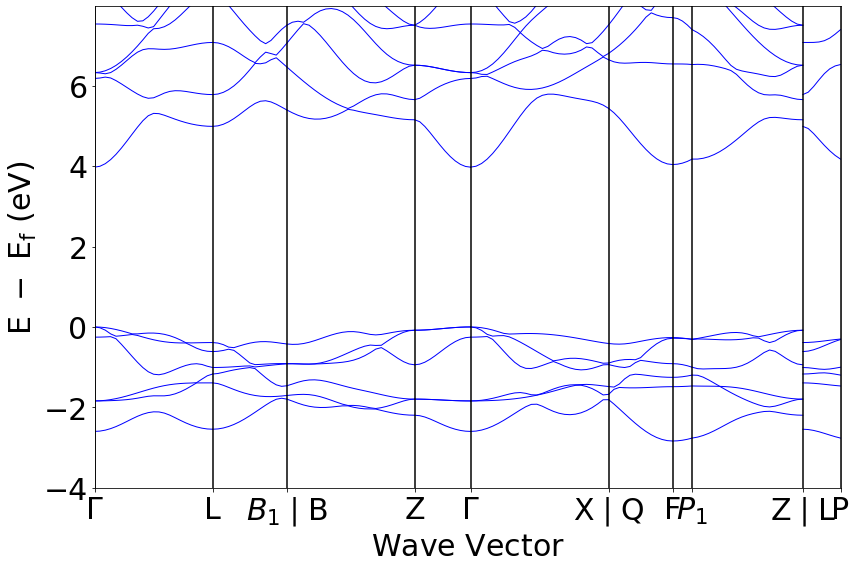

In [202]:
bplot = BSPlotter(bandstructure)

printmd('**Structure des bandes électroniques du KHoO2**')
bplot.show()

In [203]:
printmd('**Détermination de la bande interdite**')
gap = bandstructure.get_band_gap()
print('La bande interdite du KHoO2 est directe:')
print(gap['direct'])
print('\n')
print('Valeur de la bande interdite:')
print(bandstructure.get_direct_band_gap(), 'eV')
print('\n')
print('Evolution du vecteur d onde k entre les extrema:')
print(gap['transition'])

**Détermination de la bande interdite**

La bande interdite du KHoO2 est directe:
True


Valeur de la bande interdite:
3.9758 eV


Evolution du vecteur d onde k entre les extrema:
\Gamma-\Gamma


En observant le graphique ainsi qu'en analysant les données, nous pouvons affirmer que la structure électronique du KHoO2 a une bande interdite directe. En effet, le maximum de la dernière bande de valence est associé au même vecteur d'onde k que le minimum de la première bande de conduction, à savoir Γ. Comme le "band gap" est direct, les électrons auront plus de facilité à passer sur la première bande de conduction car ils ne doivent pas dévier leur trajectoire en passant d'une bande à une autre. Cependant, la différence d'énergie entre la bande de valence et la bande de conduction (et donc de la bande interdite) étant de 3.9758 eV, on peut en conclure que le KHoO2 est un isolant électrique. La dernière bande de valence est donc complètement remplie, tandis que la première bande de conduction est complètement vide.

In [204]:
printmd('**Recherche des maxima et minima de dispersion pour la dernière (première) bande de valence (conduction)**')

**Recherche des maxima et minima de dispersion pour la dernière (première) bande de valence (conduction)**

In [205]:
# Données pour la structure de bandes
a = bplot.bs_plot_data()
t = a.get('ticks')
e = a.get('energy')
d = a.get('ticks').get('distance')

In [206]:
# Energies associées aux différentes branches (représentées par des lignes verticales sur le graphique de la structure de bande)
E1 = e[0] #dans la région entre gamma et L
E2 = e[1] #dans la région entre L et B1|B
E3 = e[2] #dans la région entre B1|B et Z
E4 = e[3] #dans la région entre Z et gamma
E5 = e[4] #dans la région entre gamma et X|Q
E6 = e[5] #dans la région entre X|Q et F
E7 = e[6] #dans la région entre F et P1
E8 = e[7] #dans la région entre P1 et Z|L
E9 = e[8] #dans la région entre Z|L et P

Grâce à ces données, on peut identifier dans les différents tableaux de données les indices pour la dernière bande de valence et la première bande de conduction. Dans ce cas-ci, la dernière bande de valence a pour indice [14] dans les tableaux tandis que la première bande de conduction a [15] pour indice.

In [207]:
# Calucl de la distance entre chaque branche (nécessaire pour le calcul de la pente par la suite)
dist1 = d[1]-d[0] #entre gamma et L
dist2 = d[3]-d[1] #entre L et B1|B
dist3 = d[4]-d[3] #entre B1|B et Z
dist4 = d[6]-d[4] #entre Z et gamma
dist5 = d[8]-d[6] #entre gamma et X|Q
dist6 = d[9]-d[8] #entre X|Q et F
dist7 = d[11]-d[9] #entre F et P1
dist8 = d[13]-d[11] #entre P1 et Z|L
dist9 = d[14]-d[13] #entre Z|L et P

dist = (dist1 ,  dist2 , dist3 , dist4 , dist5 , dist6 , dist7 , dist8 , dist9)
print('distances entre les différentes branches:', dist)

distances entre les différentes branches: (1.061376042569008, 0.6668818813228963, 1.1484582035937108, 0.502289172699943, 1.2411109831197504, 0.5742290276043613, 0.1757675206860725, 0.9945940223318459, 0.3391052318370118)


In [208]:
# Calcul des pentes entre chaque branche pour la dernière bande de valence et la première bande de conduction 
printmd('**Pentes dans la première région (entre gamma et L):**')
pente_val1 = ((E1.get('1')[14])[len((E1.get('1')[14]))-1] - (E1.get('1')[14])[0])/(dist1) #pente pour la dernière bande de valence
print('1) pour la dernière bande de valence:', pente_val1)
pente_cond1 = ((E1.get('1')[15])[len((E1.get('1')[15]))-1] - (E1.get('1')[15])[0])/(dist1) #pente pour la première bande de conduction
print('2) pour la première bande de conduction:', pente_cond1)


printmd('**Pentes dans la deuxième région (entre L et B1|B):**')
pente_val2 = ((E2.get('1')[14])[len((E2.get('1')[14]))-1] - (E2.get('1')[14])[0])/(dist2) #pente pour la dernière bande de valence
print('1) pour la dernière bande de valence:', pente_val2)
pente_cond2 = ((E2.get('1')[15])[len((E2.get('1')[15]))-1] - (E2.get('1')[15])[0])/(dist2) #pente pour la première bande de conduction
print('2) pour la première bande de conduction:', pente_cond2)


printmd('**Pentes dans la troisième région (entre B1|B et Z):**')
pente_val3 = ((E3.get('1')[14])[len((E3.get('1')[14]))-1] - (E3.get('1')[14])[0])/(dist3) #pente pour la dernière bande de valence
print('1) pour la dernière bande de valence:', pente_val3)
pente_cond3 = ((E3.get('1')[15])[len((E3.get('1')[15]))-1] - (E3.get('1')[15])[0])/(dist3) #pente pour la première bande de conduction
print('2) pour la première bande de conduction:', pente_cond3)


printmd('**Pentes dans la quatrième région (entre Z et gamma):**')
pente_val4 = ((E4.get('1')[14])[len((E4.get('1')[14]))-1] - (E4.get('1')[14])[0])/(dist4) #pente pour la dernière bande de valence
print('1) pour la dernière bande de valence:', pente_val4)
pente_cond4 = ((E4.get('1')[15])[len((E4.get('1')[15]))-1] - (E4.get('1')[15])[0])/(dist4) #pente pour la première bande de conduction
print('2) pour la première bande de conduction:', pente_cond4)


printmd('**Pentes dans la cinquième région (entre gamma et X|Q):**')
pente_val5 = ((E5.get('1')[14])[len((E5.get('1')[14]))-1] - (E5.get('1')[14])[0])/(dist5) #pente pour la dernière bande de valence
print('1) pour la dernière bande de valence:', pente_val5)
pente_cond5 = ((E5.get('1')[15])[len((E5.get('1')[15]))-1] - (E5.get('1')[15])[0])/(dist5) #pente pour la première bande de conduction
print('2) pour la première bande de conduction:', pente_cond5)


printmd('**Pentes dans la sixième région (entre X|Q et F):**')
pente_val6 = ((E6.get('1')[14])[len((E6.get('1')[14]))-1] - (E6.get('1')[14])[0])/(dist6) #pente pour la dernière bande de valence
print('1) pour la dernière bande de valence:', pente_val6)
pente_cond6 = ((E6.get('1')[15])[len((E6.get('1')[15]))-1] - (E6.get('1')[15])[0])/(dist6) #pente pour la première bande de conduction
print('2) pour la première bande de conduction:', pente_cond6)


printmd('**Pentes dans la septième région (entre F et P1):**')
pente_val7 = ((E7.get('1')[14])[len((E7.get('1')[14]))-1] - (E7.get('1')[14])[0])/(dist7) #pente pour la dernière bande de valence
print('1) pour la dernière bande de valence:', pente_val7)
pente_cond7 = ((E7.get('1')[15])[len((E7.get('1')[15]))-1] - (E7.get('1')[15])[0])/(dist7) #pente pour la première bande de conduction
print('2) pour la première bande de conduction:', pente_cond7)


printmd('**Pentes dans la huitième région (entre P1 et Z|L):**')
pente_val8 = ((E8.get('1')[14])[len((E8.get('1')[14]))-1] - (E8.get('1')[14])[0])/(dist8) #pente pour la dernière bande de valence
print('1) pour la dernière bande de valence:', pente_val8)
pente_cond8 = ((E8.get('1')[15])[len((E8.get('1')[15]))-1] - (E8.get('1')[15])[0])/(dist8) #pente pour la première bande de conduction
print('2) pour la première bande de conduction:', pente_cond8)


printmd('**Pentes dans la neuvième région (entre Z|L et P):**')
pente_val9 = ((E9.get('1')[14])[len((E9.get('1')[14]))-1] - (E9.get('1')[14])[0])/(dist9) #pente pour la dernière bande de valence
print('1) pour la dernière bande de valence:', pente_val9)
pente_cond9 = ((E9.get('1')[15])[len((E9.get('1')[15]))-1] - (E9.get('1')[15])[0])/(dist9) #pente pour la première bande de conduction
print('2) pour la première bande de conduction:', pente_cond9)

**Pentes dans la première région (entre gamma et L):**

1) pour la dernière bande de valence: -0.36575161340591517
2) pour la première bande de conduction: 0.956211520983162


**Pentes dans la deuxième région (entre L et B1|B):**

1) pour la dernière bande de valence: -0.05338276686926941
2) pour la première bande de conduction: 0.6115025935193282


**Pentes dans la troisième région (entre B1|B et Z):**

1) pour la dernière bande de valence: 0.2979646964331841
2) pour la première bande de conduction: -0.21219753512789843


**Pentes dans la quatrième région (entre Z et gamma):**

1) pour la dernière bande de valence: 0.16225713081155027
2) pour la première bande de conduction: -2.347651639913866


**Pentes dans la cinquième région (entre gamma et X|Q):**

1) pour la dernière bande de valence: -0.33220236192222835
2) pour la première bande de conduction: 1.1772516881022752


**Pentes dans la sixième région (entre X|Q et F):**

1) pour la dernière bande de valence: 0.25930420240369806
2) pour la première bande de conduction: -2.430911592581075


**Pentes dans la septième région (entre F et P1):**

1) pour la dernière bande de valence: -0.21334999693701387
2) pour la première bande de conduction: 0.7680599889732469


**Pentes dans la huitième région (entre P1 et Z|L):**

1) pour la dernière bande de valence: 0.2205925182272987
2) pour la première bande de conduction: 0.9842206749895293


**Pentes dans la neuvième région (entre Z|L et P):**

1) pour la dernière bande de valence: 0.2574422090956119
2) pour la première bande de conduction: -2.4024990578487424


On peut maintenant trouver les maximum et minimum de dispersion pour la dernière bande de valence et la première bande de conduction en trouvant les pentes maximales et minimales parmi.

In [209]:
printmd('**Dispersions maximales et minimales pour les différentes bandes:**')

print('Pour la dernière bande de valence:')
#on cherche la pente maximale des pentes calculées ci-dessus pour la dernière bande de valence et ainsi déterminer la dispersion maximale
dispmax_val = max(abs(pente_val1),abs(pente_val2),abs(pente_val3),abs(pente_val4),abs(pente_val5),abs(pente_val6),abs(pente_val7),abs(pente_val8),abs(pente_val9))
print('- Dispersion maximale:', dispmax_val, '(=pente 1) => La dispersion est maximale dans la direction \u0393 - L' )

#on cherche la pente minimale des pentes calculées ci-dessus pour la dernière bande de valence et ainsi déterminer la dispersion minimale
dispmin_val = min(abs(pente_val1),abs(pente_val2),abs(pente_val3),abs(pente_val4),abs(pente_val5),abs(pente_val6),abs(pente_val7),abs(pente_val8),abs(pente_val9))
print('- Dispersion minimale:', dispmin_val, '(=pente 2) => La dispersion est minimale dans la direction L - B1|B' )
print('\n')

print('Pour la première bande de conduction:')
#on cherche la pente maximale des pentes calculées ci-dessus pour la première bande de conduction et ainsi déterminer la dispersion maximale
dispmax_cond = max(abs(pente_cond1),abs(pente_cond2),abs(pente_cond3),abs(pente_cond4),abs(pente_cond5),abs(pente_cond6),abs(pente_cond7),abs(pente_cond8),abs(pente_cond9))
print('- Dispersion maximale:', dispmax_cond, '(=pente 6) => La dispersion est maximale dans la direction X|Q - F' )

#on cherche la pente minimale des pentes calculées ci-dessus pour la première bande de conduction et ainsi déterminer la dispersion minimale
dispmin_cond = min(abs(pente_cond1),abs(pente_cond2),abs(pente_cond3),abs(pente_cond4),abs(pente_cond5),abs(pente_cond6),abs(pente_cond7),abs(pente_cond8),abs(pente_cond9))
print('- Dispersion minimale:', dispmin_cond, '(=pente 3) => La dispersion est minimale dans la direction B1|B - Z' )

**Dispersions maximales et minimales pour les différentes bandes:**

Pour la dernière bande de valence:
- Dispersion maximale: 0.36575161340591517 (=pente 1) => La dispersion est maximale dans la direction Γ - L
- Dispersion minimale: 0.05338276686926941 (=pente 2) => La dispersion est minimale dans la direction L - B1|B


Pour la première bande de conduction:
- Dispersion maximale: 2.430911592581075 (=pente 6) => La dispersion est maximale dans la direction X|Q - F
- Dispersion minimale: 0.21219753512789843 (=pente 3) => La dispersion est minimale dans la direction B1|B - Z


**Représentation graphique des dispersions sur la structure des bandes électroniques**

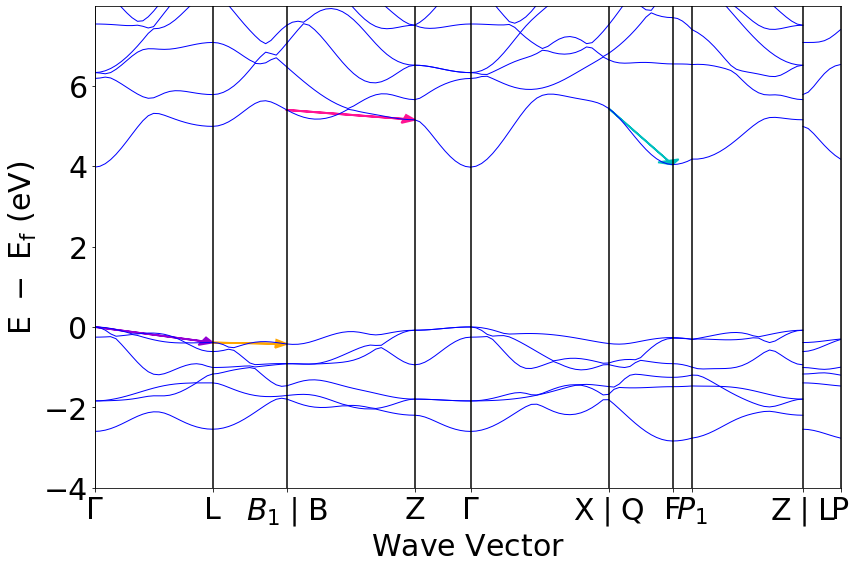

In [210]:
printmd('**Représentation graphique des dispersions sur la structure des bandes électroniques**')
fig = bplot.get_plot()

#flèche pour la dispersion maximale de la dernière bande de valence
dispmaxv = plt.arrow(d[0], (E1.get('1')[14])[0], dist1, (E1.get('1')[14])[len(E1.get('1')[14]) - 1] - (E1.get('1')[14])[0], head_width=0.2, head_length=0.1, linewidth=1.8, color='darkviolet', length_includes_head=True)

#flèche pour la dispersion minimale de la dernière bande de valence
dispminv = plt.arrow(d[1], (E2.get('1')[14])[0], dist2, (E2.get('1')[14])[len(E2.get('1')[14]) - 1] - (E2.get('1')[14])[0], head_width=0.2, head_length=0.1, linewidth=1.8, color='orange', length_includes_head=True)

#flèche pour la dispersion maximale de la première bande de conduction
dispmaxc = plt.arrow(d[8], (E6.get('1')[15])[0], dist6, (E6.get('1')[15])[len(E6.get('1')[15]) - 1] - (E6.get('1')[15])[0], head_width=0.2, head_length=0.1, linewidth=1.8, color='c', length_includes_head=True)

#flèche pour la dispersion minimale de la première bande de conduction
dispminv = plt.arrow(d[3], (E3.get('1')[15])[0], dist3, (E3.get('1')[15])[len(E3.get('1')[15]) - 1] - (E3.get('1')[15])[0], head_width=0.2, head_length=0.1, linewidth=2, color='deeppink', length_includes_head=True)

On observe un maximum de dispersion pour la dernière bande de valence dans la direction Γ - L, représenté par la flèche mauve. Le minimum de dispersion pour la dernière bande de valence est situé dans la direction L - B1|B, représenté par la flèche jaune. 

En ce qui concerne la première bande de conduction, son maximum de dispersion se situe dans la direction X|Q - F, représenté par la flèche mauve, tandis que son minimum de dispersion se situe dans la direction B1|B - Z, représenté par la flèche rose.

In [211]:
printmd('**Calcul de la masse effective**')

**Calcul de la masse effective**

Dans cette section nous allons calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique. Nous savons tout d'abord que la masse effective peut se calculer avec la formule suivante:

![](Meff.PNG)

où m* est la masse effective, h est la constante de Planck en J.s et le dénominateur correspond à la dérivée seconde de l'énergie de la bande par rapport au vecteur d'onde. Notons que l'énergie est exprimée en eV et le vecteur d'onde en 1/Å.

Comme nous supponsons une dispersion parabolique, on peut approximer le sommet (base) de la bande de valence (conduction) par une parabole de type a.x^2+b.x+c. Il nous sera possible de trouver les coefficients de cette parabole en utilisant le point du maximum de la bande de valence ou celui du minimum de la bande de conduction ainsi qu'un autre point sur une des branches voisines. On obtiendra dès lors un système d'équations à trois inconnues qui nous permettra de trouver l'équation exacte de la parabole.

In [212]:
# Recherche des coordonnées du maximum de la dernière bande de valence
xsV = d[6]   #maximum en gamma
ysV = E5.get('1')[14][0]
xy1 = (xsV, ysV)
print('Coordonnées du maximum de la dernière bande de valence:', xy1)

#Recherche des coordonnées d'un point sur une branche voisine (branche de droite)
xpV = a.get('distances')[4][1]
ypV = E5.get('1')[14][1]
xy2 = (xpV, ypV)
print('Coordonnées d un point proche du maximum:', xy2)


Coordonnées du maximum de la dernière bande de valence: (3.379005300185558, 0.0)
Coordonnées d un point proche du maximum: (3.4286497322489877, -0.0049000000000000155)


In [213]:
#Calcul des coefficients de la parabole
aV = (ypV-ysV)/(xpV-xsV)**2
bV = -2*xsV*aV
cV = aV*xsV*xsV+ysV

abc = (aV, bV, cV)
print('On trouve la valeur des coefficients (a, b, c) =', abc)

On trouve la valeur des coefficients (a, b, c) = (-1.9881767309844587, 13.436119423404165, -22.7003593728044)


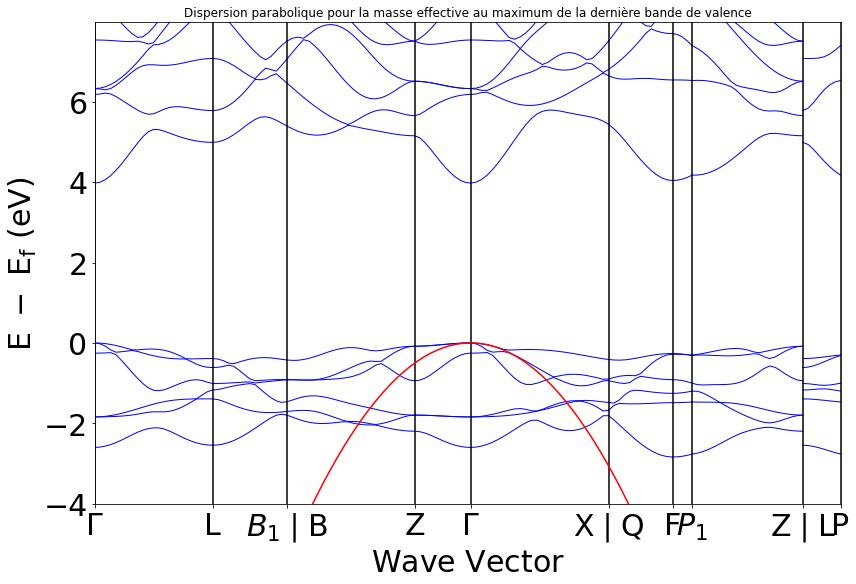

In [214]:
# Représentation de la parabole sur le graphique
fig = bplot.get_plot()

vect = np.arange(0.0,10,0.01)
def f(vect):
    return aV*(vect)**2 + bV*(vect) + cV
plt.title('Dispersion parabolique pour la masse effective au maximum de la dernière bande de valence')
plt.plot(vect, f(vect), 'r')
plt.show()

On peut maintenant calculer la dérivée seconde de la parabole, pour ensuite calculer la masse effective au sommet de la bande de valence:

In [215]:
# calcul de la dérivée seconde avec conversion d'eV en J (1eV = 1.602*10^(19)J) et conversion d'A en m (1A = 10^(-10)m)
ddV = 2*aV*1.602*10**(-19)*10**(-20)
print('Dérivée seconde =', ddV, 'J.m²')

#Calcul de la masse effective
import scipy.constants as sc
mV = ((sc.hbar)**2)/ddV
print('Masse effective =', mV, 'kg')

Dérivée seconde = -6.370118246074205e-39 J.m²
Masse effective = -1.745841561510887e-30 kg


On remarque que la courbure de la parabole est relativement plate. Cela est du au fait que le maximum de la dernière bande de valence présente une dispersion relativement plate. En effet, si on regarde la formule avec laquelle on calcule la masse effective, on remarque que celle-ci est inversément proportionnelle à la concavité de l'énergie en fonction des vecteurs d'onde k. Cela explique donc pourquoi la masse effective obtenue pour le maximum est négative. On peut également noter que plus la 'courbe' sera plate, plus la masse effective sera grande.

In [216]:
# Recherche des coordonnées du minimum de la première bande de conduction
xsC = d[6]    #minimum en gamma
ysC = E5.get('1')[15][0]
xy3 = (xsC, ysC)
print('Coordonnées du minimum de la première bande de conduction:', xy3)

#Recherche des coordonnées d'un point sur une branche voisine (branche de droite)
xpC = a.get('distances')[4][1]
ypC = E5.get('1')[15][1]
xy4 = (xpC, ypC)
print('Coordonnées d un point proche du minimum:', xy4)


Coordonnées du minimum de la première bande de conduction: (3.379005300185558, 3.9758999999999998)
Coordonnées d un point proche du minimum: (3.4286497322489877, 3.9993000000000003)


In [217]:
#Calcul des coefficients de la parabole
aC = (ypC-ysC)/(xpC-xsC)**2
bC = -2*xsC*aC
cC = aC*xsC*xsC+ysC

abc2 = (aC, bC, cC)
print('On trouve la valeur des coefficients (a, b, c) =', abc2)

On trouve la valeur des coefficients (a, b, c) = (9.494558266334131, -64.16432540972727, 112.38169782114966)


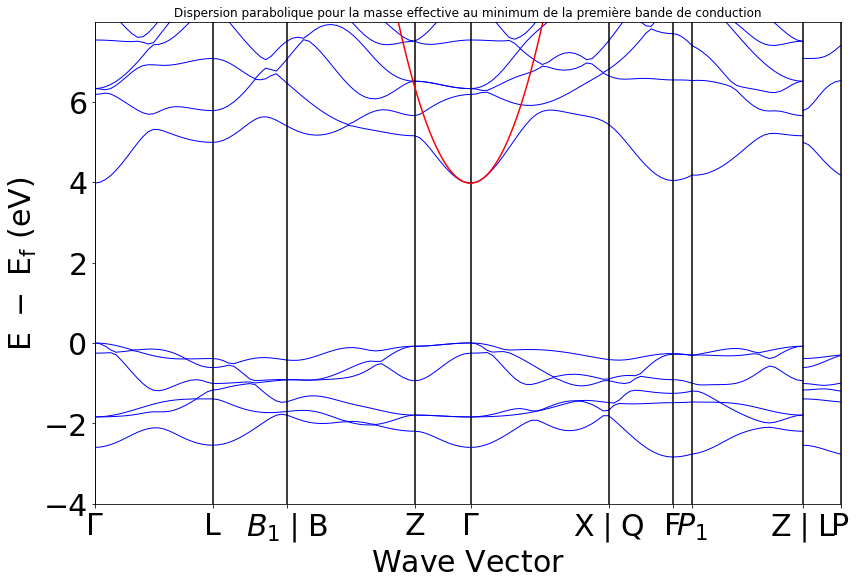

In [218]:
# Représentation de la parabole sur le graphique
fig2 = bplot.get_plot()

vect2 = np.arange(0.0,10,0.01)
def fC(vect2):
    return aC*(vect2)**2 + bC*(vect2) + cC
plt.title('Dispersion parabolique pour la masse effective au minimum de la première bande de conduction')
plt.plot(vect, fC(vect2), 'r')
plt.show()

In [219]:
# calcul de la dérivée seconde avec conversion d'eV en J (1eV = 1.602*10^(19)J) et conversion d'A en m (1A = 10^(-10)m)
ddC = 2*aC*1.602*10**(-19)*10**(-20)
print('Dérivée seconde =', ddC, 'J.m²')

#Calcul de la masse effective
mC = ((sc.hbar)**2)/ddC
print('Masse effective =', mC, 'kg')

Dérivée seconde = 3.0420564685334554e-38 J.m²
Masse effective = 3.655822073249222e-31 kg


On remarque que cette fois-ci la masse effective est positive, cela est normal et dû au fait que la concavité au minimum de conduction est positive. De plus on observe que la masse effective est plus petite que celle calculée pour le maximum de valence. Cela est du au fait que la courbure au minimum de conduction est plus prononcée (et donc moins plate) que pour le maximum de conduction.